# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [33]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple and apply a head()

In [44]:
df = pd.read_csv(url)

In [45]:
apple = df.copy()

In [46]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [47]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type and check the info()

In [48]:
apple.Date = pd.to_datetime(apple.Date)

In [49]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [50]:
apple.set_index(keys='Date', drop=True, inplace=True)

In [51]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [52]:
#Teacher solution
apple.index.is_unique

True

In [53]:
apple.index.shape[0] == len(apple.index.unique())

True

In [54]:
apple.shape[0] #número de filas/registros que tiene el DataFrame

8465

In [55]:
 len(apple.index.unique()) #Número de elementos únicos que tiene el indice

8465

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [56]:
apple.head(), apple.tail()

(             Open   High    Low  Close    Volume  Adj Close
 Date                                                       
 2014-07-08  96.27  96.80  93.92  95.35  65130000      95.35
 2014-07-07  94.14  95.99  94.10  95.97  56305400      95.97
 2014-07-03  93.67  94.10  93.20  94.03  22891800      94.03
 2014-07-02  93.87  94.06  93.09  93.48  28420900      93.48
 2014-07-01  93.52  94.07  93.13  93.52  38170200      93.52,
              Open   High    Low  Close     Volume  Adj Close
 Date                                                        
 1980-12-18  26.63  26.75  26.63  26.63   18362400       0.41
 1980-12-17  25.87  26.00  25.87  25.87   21610400       0.40
 1980-12-16  25.37  25.37  25.25  25.25   26432000       0.39
 1980-12-15  27.38  27.38  27.25  27.25   43971200       0.42
 1980-12-12  28.75  28.87  28.75  28.75  117258400       0.45)

In [57]:
apple.sort_index(ascending= True, inplace=True)

In [58]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [59]:
#Teacher solution
app_final_month = apple.asfreq(freq='BM') 
app_final_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


In [60]:
bm_apple = apple.resample('BM').sum()

In [61]:
bm_apple.loc['1998-01-30':'1998-02-27',:]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1998-01-30,365.95,381.63,355.65,371.73,2552894400,12.68
1998-02-27,375.01,385.87,368.70,380.17,1838541600,12.98


In [62]:
bm_apple['weekday'] = bm_apple.index.weekday

In [64]:
bm_apple.head()

,Open,High,Low,Close,Volume,Adj Close,weekday
Date,,,,,,,
1980-12-31,396.26,397.38,395.76,395.76,336212800,6.15,2
1981-01-30,666.85,668.36,664.75,664.75,152247200,10.37,4
1981-02-27,503.12,504.87,501.75,501.75,80404800,7.81,4
1981-03-31,548.63,550.37,546.40,546.40,175179200,8.53,1
1981-04-30,573.02,574.73,571.77,571.77,134232000,8.89,3


In [63]:
bm_apple[bm_apple.weekday.isin([5,6])]

,Open,High,Low,Close,Volume,Adj Close,weekday
Date,,,,,,,


### Step 10.  What is the difference in days between the first day and the oldest

In [66]:
(apple.index[-1] - apple.index[0]).days

12261

In [65]:
apple.index.max()-apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [67]:
#Teacher solution
app_final_month.shape[0] 

403

In [70]:
app_final_month.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200.0,90.43
2014-06-30,92.10,93.73,92.09,92.93,49482300.0,92.93


In [ ]:
#La diferencia entre uno y otro es que:
    #'app_final_month = apple.asfreq(freq='BM')'  obtenemos los intervalos
    #'bm_apple = apple.resample('BM').sum()' obtenemos los límites

In [71]:
bm_apple.tail()

,Open,High,Low,Close,Volume,Adj Close,weekday
Date,,,,,,,
2014-03-31,11205.46,11265.53,11131.49,11197.50,1250424700,1590.75,0
2014-04-30,11341.72,11431.33,11261.51,11362.56,1608765200,1614.21,2
2014-05-30,12627.34,12733.83,12564.99,12667.11,1433917100,1807.23,4
2014-06-30,4669.56,4705.77,4635.45,4675.82,1206556300,1929.60,0
2014-07-31,471.47,475.02,467.44,472.35,210918300,472.35,3


In [69]:
apple.resample('M').count().shape

(404, 6)

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

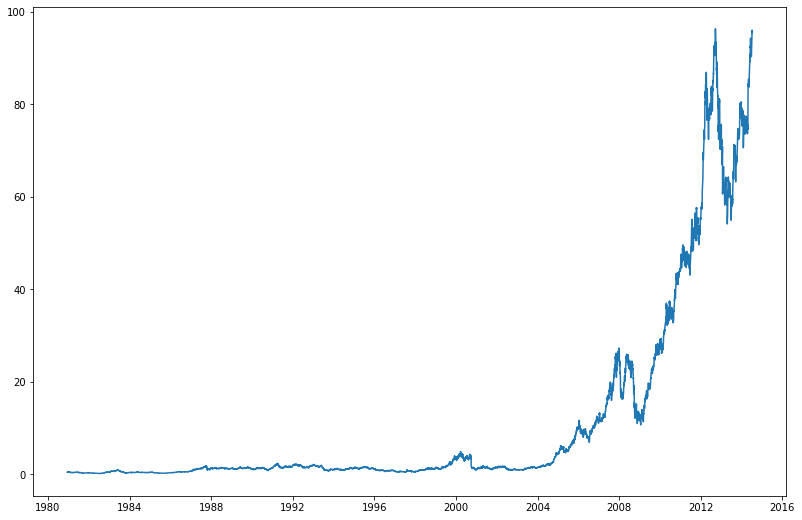

In [74]:
plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close']);

### BONUS: Create your own question and answer it.